## Imports

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

## Data 

In [34]:
df = pd.read_csv("bank-additional-full.csv",delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [37]:
#No null data
#Numeric Data:
numeric = ["age",'duration','pdays','pdays',
          'emp.var.rate','cons.price.idx','cons.conf.idx',
          'euribor3m','nr.employed','campaign']

categorical = [z for z in df.columns if z not in numeric]
categorical.remove('y')
predict = "y"

In [38]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [39]:
df['y'] = df['y'].replace(['yes','no'],[1,0])
#string to integer

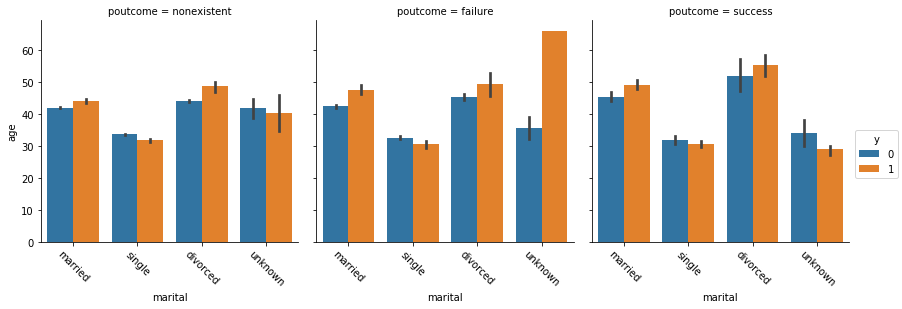

In [40]:
g = sns.factorplot(x='marital', 
                   y='age', 
                   data=df, 
                   hue='y',
                   col='poutcome',
                  kind = 'bar')  
                   
g.set_xticklabels(rotation=-45)

## For Numeric Data 

age


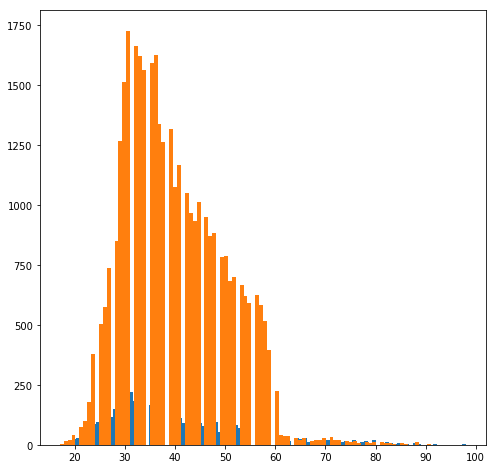

duration


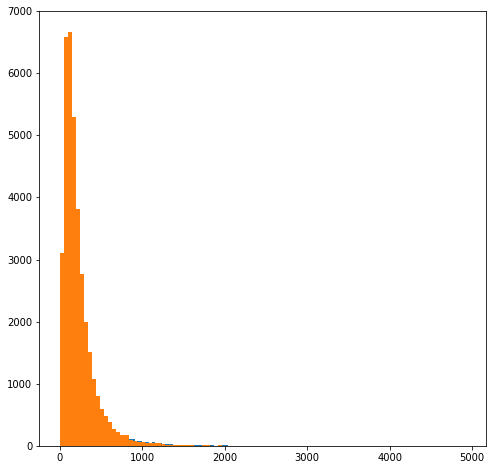

pdays


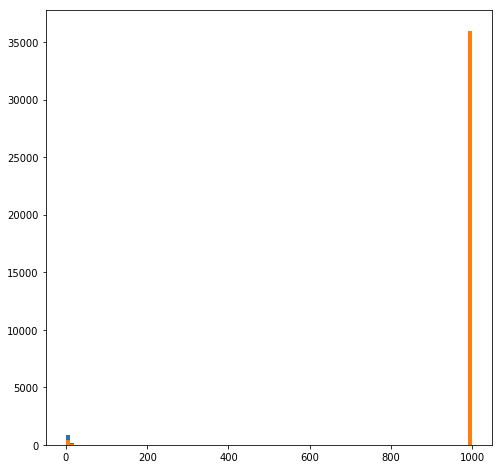

pdays


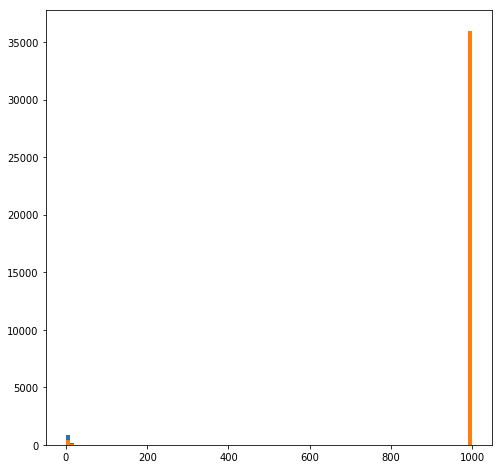

emp.var.rate


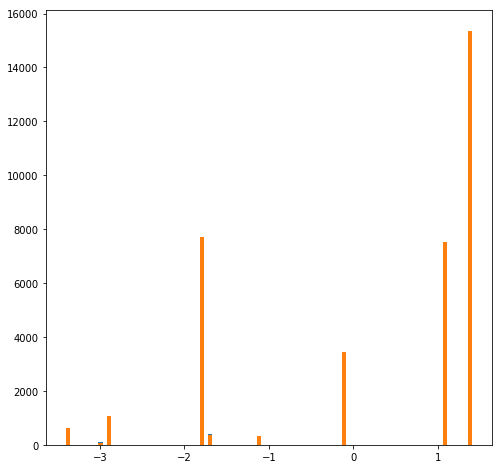

cons.price.idx


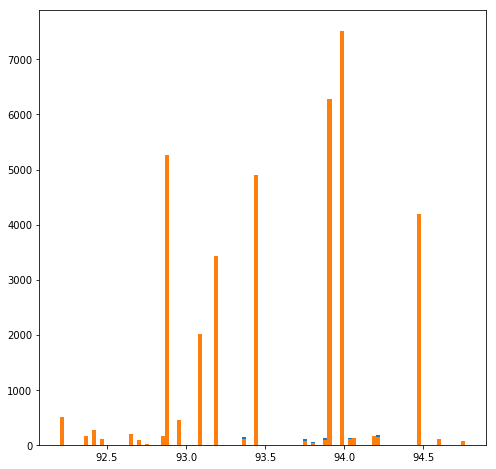

cons.conf.idx


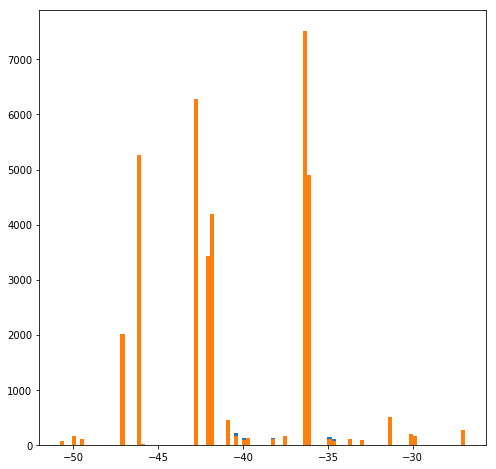

euribor3m


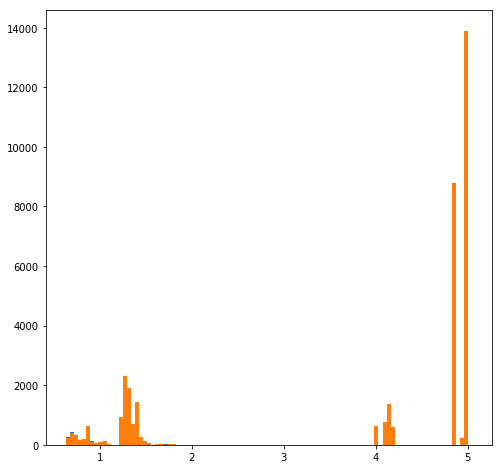

nr.employed


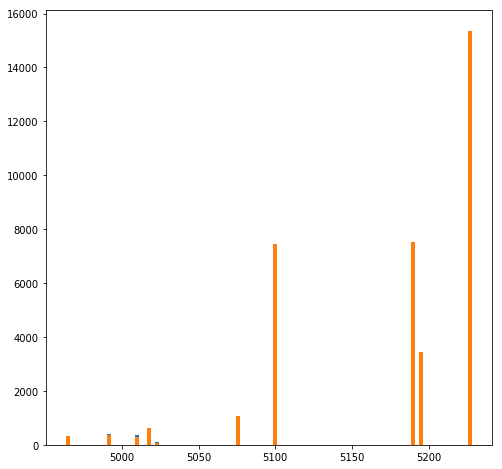

campaign


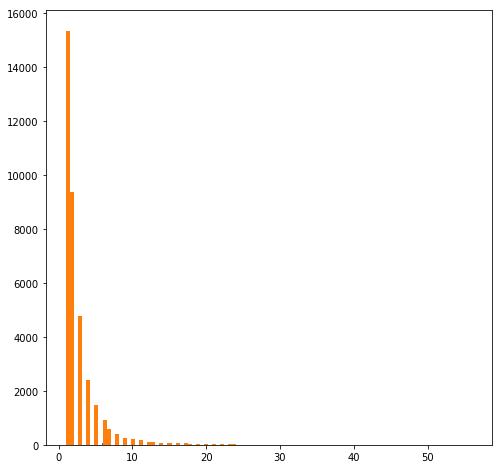

In [41]:
for i in numeric:
    plt.figure(figsize=(8,8))
    plt.hist(df[df['y']==1][i].values,bins=100,label='yes')
    plt.hist(df[df['y']==0][i].values,bins=100,label='no')
    print(i)
    plt.show()

## For Categorical Data

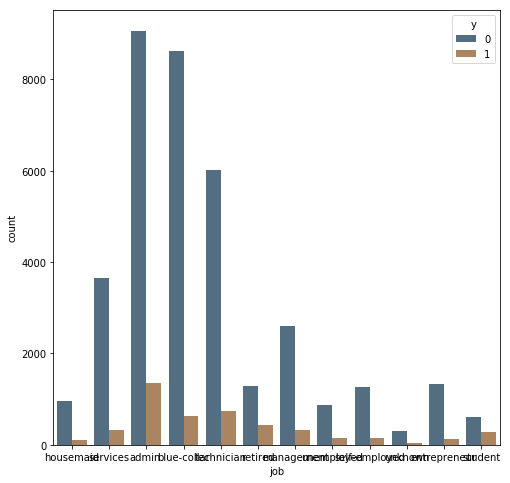

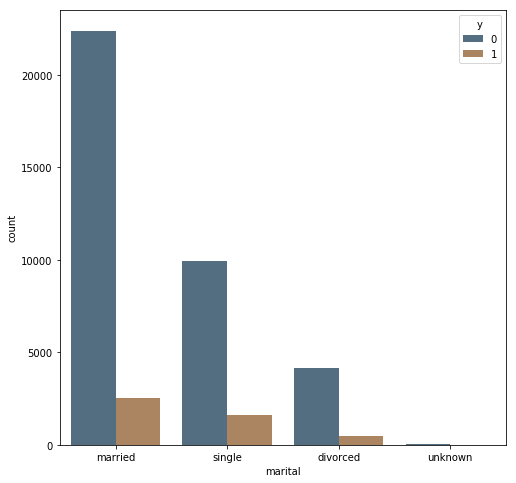

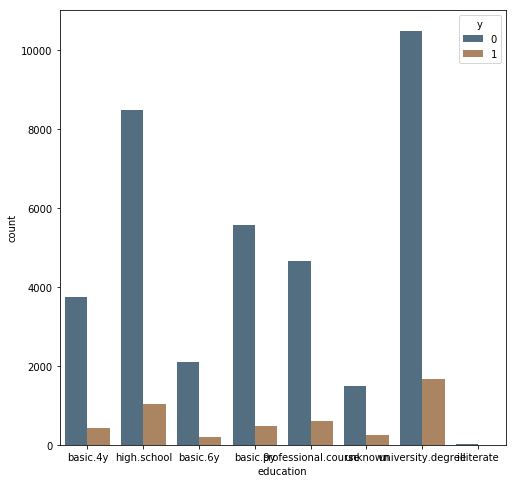

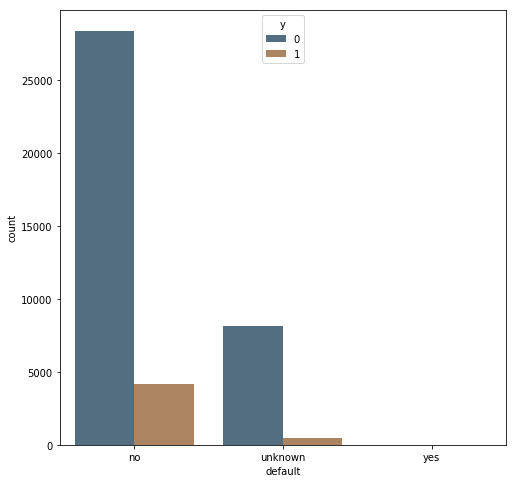

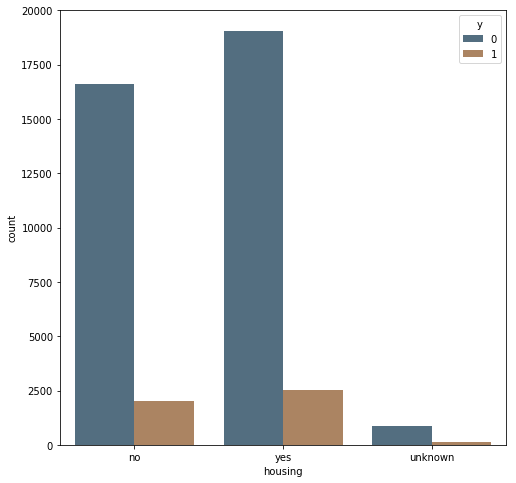

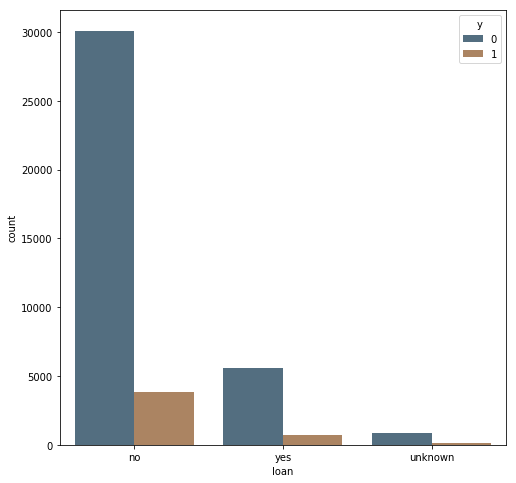

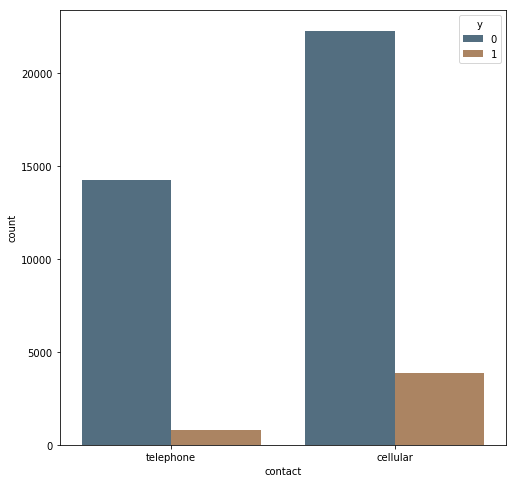

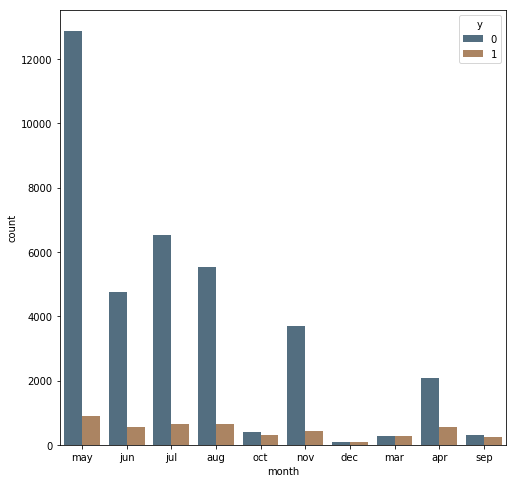

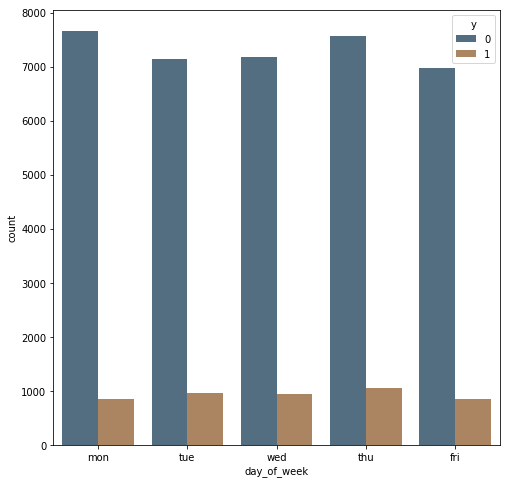

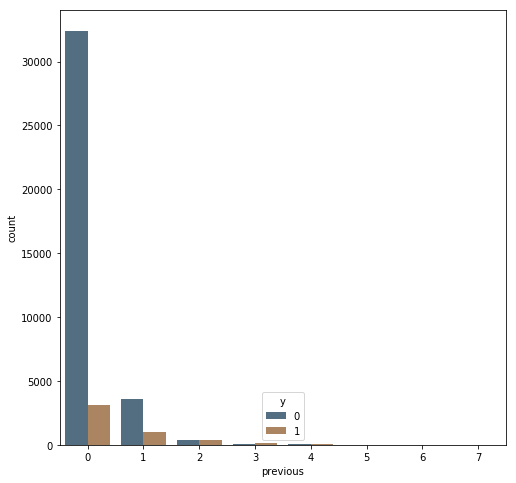

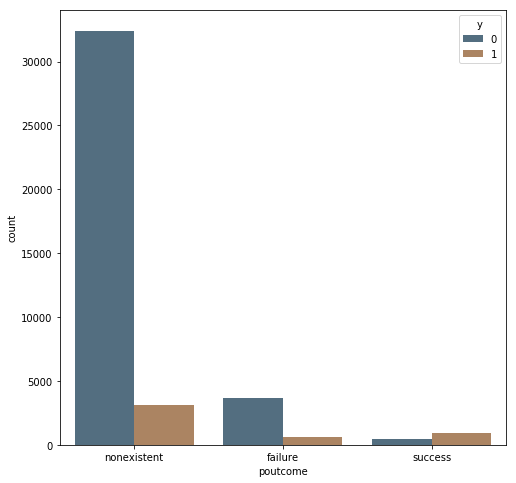

In [42]:
for i in categorical:
    plt.figure(figsize=(8,8))
    sns.countplot(x=i,hue=predict,data=df,
                  saturation=0.3)

### Eliminating less important features

In [43]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'previous',
 'poutcome']

In [44]:
# for i in categorical:
#     cat = pd.get_dummies(df[i],drop_first=True)
job = pd.get_dummies(df['job'],drop_first=True)
marital = pd.get_dummies(df['marital'],drop_first=True)
education = pd.get_dummies(df['education'],drop_first=True)
default = pd.get_dummies(df['default'],drop_first=True)
housing = pd.get_dummies(df['housing'],drop_first=True)
loan = pd.get_dummies(df['loan'],drop_first=True)
contact = pd.get_dummies(df['contact'],drop_first=True)
month = pd.get_dummies(df['month'],drop_first=True)
day_of_week = pd.get_dummies(df['day_of_week'],drop_first=True)
previous = pd.get_dummies(df['previous'],drop_first=True)
poutcome = pd.get_dummies(df['poutcome'],drop_first=True)

In [45]:
df = df.append([job,
 marital,
 education,
 default,
 housing,
 loan,
 contact,
 month,
 day_of_week,
 previous,
 poutcome])

In [46]:
# enc = LabelEncoder()
# enc.fit(categorical)
# trans = enc.transform(categorical)
# trans = trans.reshape(-1,1)
# ohe = OneHotEncoder()
# trans = ohe.fit_transform(trans)

In [47]:
# print(trans)

In [48]:
df.fillna(0,inplace=True)

In [49]:
df = df.drop(categorical,axis=1)

In [50]:
df = df.drop("pdays",axis=1)

In [51]:
numeric.remove("pdays")

## Correlation

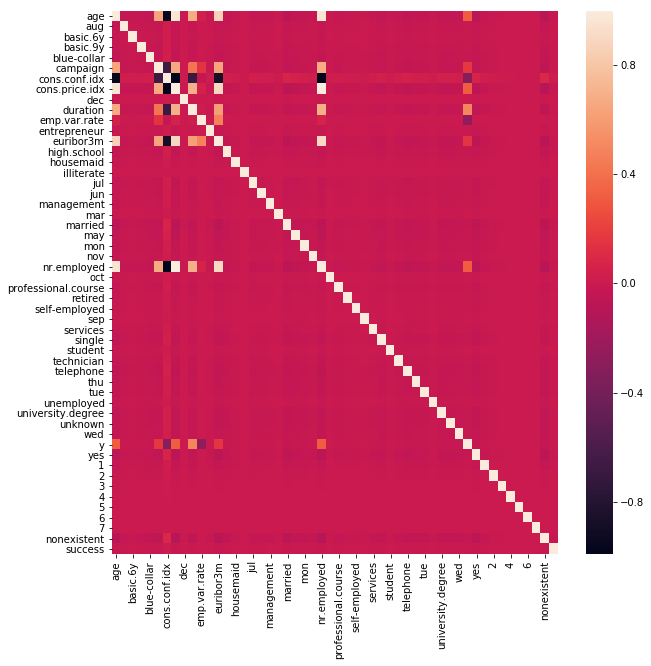

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## Extreme dark and and extreme white are most corelated spots

In [53]:
X = df[[i for i in df.columns if i != "y"]]
y = df["y"]    #target column

[1.80786008e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.60949054e-02 5.03214137e-02 6.07902388e-02
 0.00000000e+00 4.14624699e-01 3.59150820e-02 0.00000000e+00
 1.44198196e-01 1.86182785e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.52496001e-06 0.00000000e+00
 5.24310879e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.69062182e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.21886146e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.50512118e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.57395224e-04 0.00000000e+00]


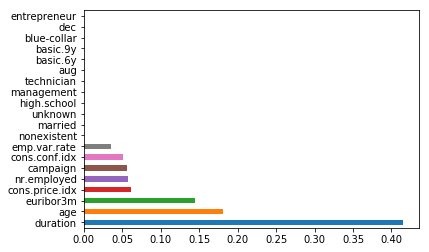

In [54]:
#Tree based classifier feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [55]:
df_select=df[feat_importances.nlargest(20).index.values]
df_select["y"]=df["y"]
X=df_select[[i for i in df_select.columns if i != "y"]].values
y=df_select["y"].values

/home/kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [57]:
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=12)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25, random_state=12)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [61]:
from sklearn.metrics import recall_score
print('Results')
print(rf.score(x_val, y_val))
print(recall_score(y_val, rf.predict(x_val)))

Results
0.9919273256990248
0.5221987315010571


## This is the validation score with random forest having 0.99 accuracy 
### Further we can also use KNN and other classifier like Gradient Boosting to achieve more better score.